# Comparison between training with and without Adam optimizer 

## Import libreries and define global variables

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from NeuralNetwork import NeuralNetwork
from utils import get_data, onehot_encoding, grid_search, save_dict_to_file, load_dict_from_file
from Layer import Layer, Input
from functions import accuracy, MSE, MEE
import pandas as pd

In [2]:
DIR = '/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/' # Directory of the package.

## Import datasets

### Import MONK datasets

In [3]:
df = get_data(f'{DIR}data/MONK/monks-1.train')
df_test = get_data(f'{DIR}data/MONK/monks-1.test')

X_train_monk, y_train_monk = df.drop(columns=['target','id']).to_numpy().T, df['target'].apply(lambda x: int(x)).to_numpy().T
X_test_monk, y_test_monk = df_test.drop(columns=['target','id']).to_numpy().T, df_test['target'].apply(lambda x: int(x)).to_numpy().T

### Import CUP dataset

Define the fraction of dataset which will represent the internal test set.

In [4]:
test_frac = 1/4

In [5]:
names = ['id', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 
         'feature_7', 'feature_8', 'feature_9', 'feature_10', 'target_x', 'target_y','target_z']

df = pd.read_csv(f"{DIR}data/ML-CUP23-TR.csv", names=names, comment='#')

targets = ['target_x', 'target_y', 'target_z']
features = list(set(names) - {'id', 'target_x', 'target_y', 'target_z'})

df = df.sample(frac=1)

train_test_div = round((1-test_frac) * df.shape[0])

X_train_cup, y_train_cup = df[:train_test_div][features].to_numpy().T, df[:train_test_div][targets].to_numpy().T
X_test_cup, y_test_cup = df[train_test_div:][features].to_numpy().T, df[train_test_div:][targets].to_numpy().T

## Data preprocessing

### MONK preprocessing

Process one hot encoding on training and test sets.

In [6]:
X_train_monk = onehot_encoding(X_train_monk)
X_test_monk = onehot_encoding(X_test_monk)

### CUP preprocessing

Decide which data preprocessing method apply to cup training set:
+ MinMax normalization (preprocessing = 1)
+ Standardization (preprocessing = 2)

In [7]:
preprocessing = 0

In [8]:
if preprocessing == 1:
    X_train_cup = minmax_norm(X_train_cup)
    X_test_cup = minmax_norm(X_test_cup)
elif preprocessing == 2:
    X_train_cup = standard(X_train_cup)
    X_test_cup = standard(X_test_cup)

## MONK

Define training and model hyperparameters

In [39]:
orig_params = {'hidden_dim': 4,
        'hidden_act_func': 'tanh',
        'eta': 0.1,
        'lam': 0.0,
        'alpha': 0.9,
        'n_batch': 99,
        'use_opt':0,
        'nest': False,
        'l1_reg' : False,
        'epochs' : 500
        }

seed = np.random.randint(10,10000)

### No optimizer

Build model

In [40]:
params = orig_params.copy()
input_layer = Input(17)
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'), init_weights_mode='rand')
output_layer = Layer(hidden_layer, 1, 'sigm', init_weights_mode='rand')

model = NeuralNetwork(input_layer, output_layer, loss = 'binary_crossentropy', metrics = [accuracy, MSE])

init_weights_list = model.get_initial_weights_list()

Training without Adam optimizer:

In [41]:
np.random.seed(seed)
params['use_opt'] = 0
history_noopt = model.train(X_train_monk, y_train_monk.reshape((1,X_train_monk.shape[1])),
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None,
                                    **params
                                    )

Epoch 0: train_loss: 6.922e-01, val_loss: 6.861e-01; train_accuracy: 5.253e+01, val_accuracy: 4.800e+01  train_MSE: 2.495e-01, val_MSE: 2.465e-01  lr : 0.1
Epoch 1: train_loss: 6.912e-01, val_loss: 6.847e-01; train_accuracy: 5.354e+01, val_accuracy: 5.200e+01  train_MSE: 2.490e-01, val_MSE: 2.458e-01  lr : 0.1
Epoch 2: train_loss: 6.898e-01, val_loss: 6.828e-01; train_accuracy: 5.455e+01, val_accuracy: 5.600e+01  train_MSE: 2.483e-01, val_MSE: 2.449e-01  lr : 0.1
Epoch 3: train_loss: 6.881e-01, val_loss: 6.806e-01; train_accuracy: 5.657e+01, val_accuracy: 6.000e+01  train_MSE: 2.475e-01, val_MSE: 2.437e-01  lr : 0.1
Epoch 4: train_loss: 6.862e-01, val_loss: 6.779e-01; train_accuracy: 5.657e+01, val_accuracy: 6.400e+01  train_MSE: 2.465e-01, val_MSE: 2.424e-01  lr : 0.1
Epoch 5: train_loss: 6.841e-01, val_loss: 6.750e-01; train_accuracy: 5.556e+01, val_accuracy: 6.800e+01  train_MSE: 2.455e-01, val_MSE: 2.409e-01  lr : 0.1
Epoch 6: train_loss: 6.818e-01, val_loss: 6.719e-01; train_accur

Epoch 67: train_loss: 3.346e-01, val_loss: 4.874e-01; train_accuracy: 8.788e+01, val_accuracy: 8.000e+01  train_MSE: 1.020e-01, val_MSE: 1.563e-01  lr : 0.1
Epoch 68: train_loss: 3.302e-01, val_loss: 4.882e-01; train_accuracy: 8.788e+01, val_accuracy: 8.000e+01  train_MSE: 1.005e-01, val_MSE: 1.568e-01  lr : 0.1
Epoch 69: train_loss: 3.257e-01, val_loss: 4.889e-01; train_accuracy: 8.889e+01, val_accuracy: 8.000e+01  train_MSE: 9.909e-02, val_MSE: 1.574e-01  lr : 0.1
Epoch 70: train_loss: 3.213e-01, val_loss: 4.895e-01; train_accuracy: 8.889e+01, val_accuracy: 8.000e+01  train_MSE: 9.765e-02, val_MSE: 1.578e-01  lr : 0.1
Epoch 71: train_loss: 3.170e-01, val_loss: 4.900e-01; train_accuracy: 8.889e+01, val_accuracy: 8.000e+01  train_MSE: 9.622e-02, val_MSE: 1.583e-01  lr : 0.1
Epoch 72: train_loss: 3.126e-01, val_loss: 4.903e-01; train_accuracy: 8.889e+01, val_accuracy: 8.000e+01  train_MSE: 9.481e-02, val_MSE: 1.587e-01  lr : 0.1
Epoch 73: train_loss: 3.083e-01, val_loss: 4.903e-01; trai

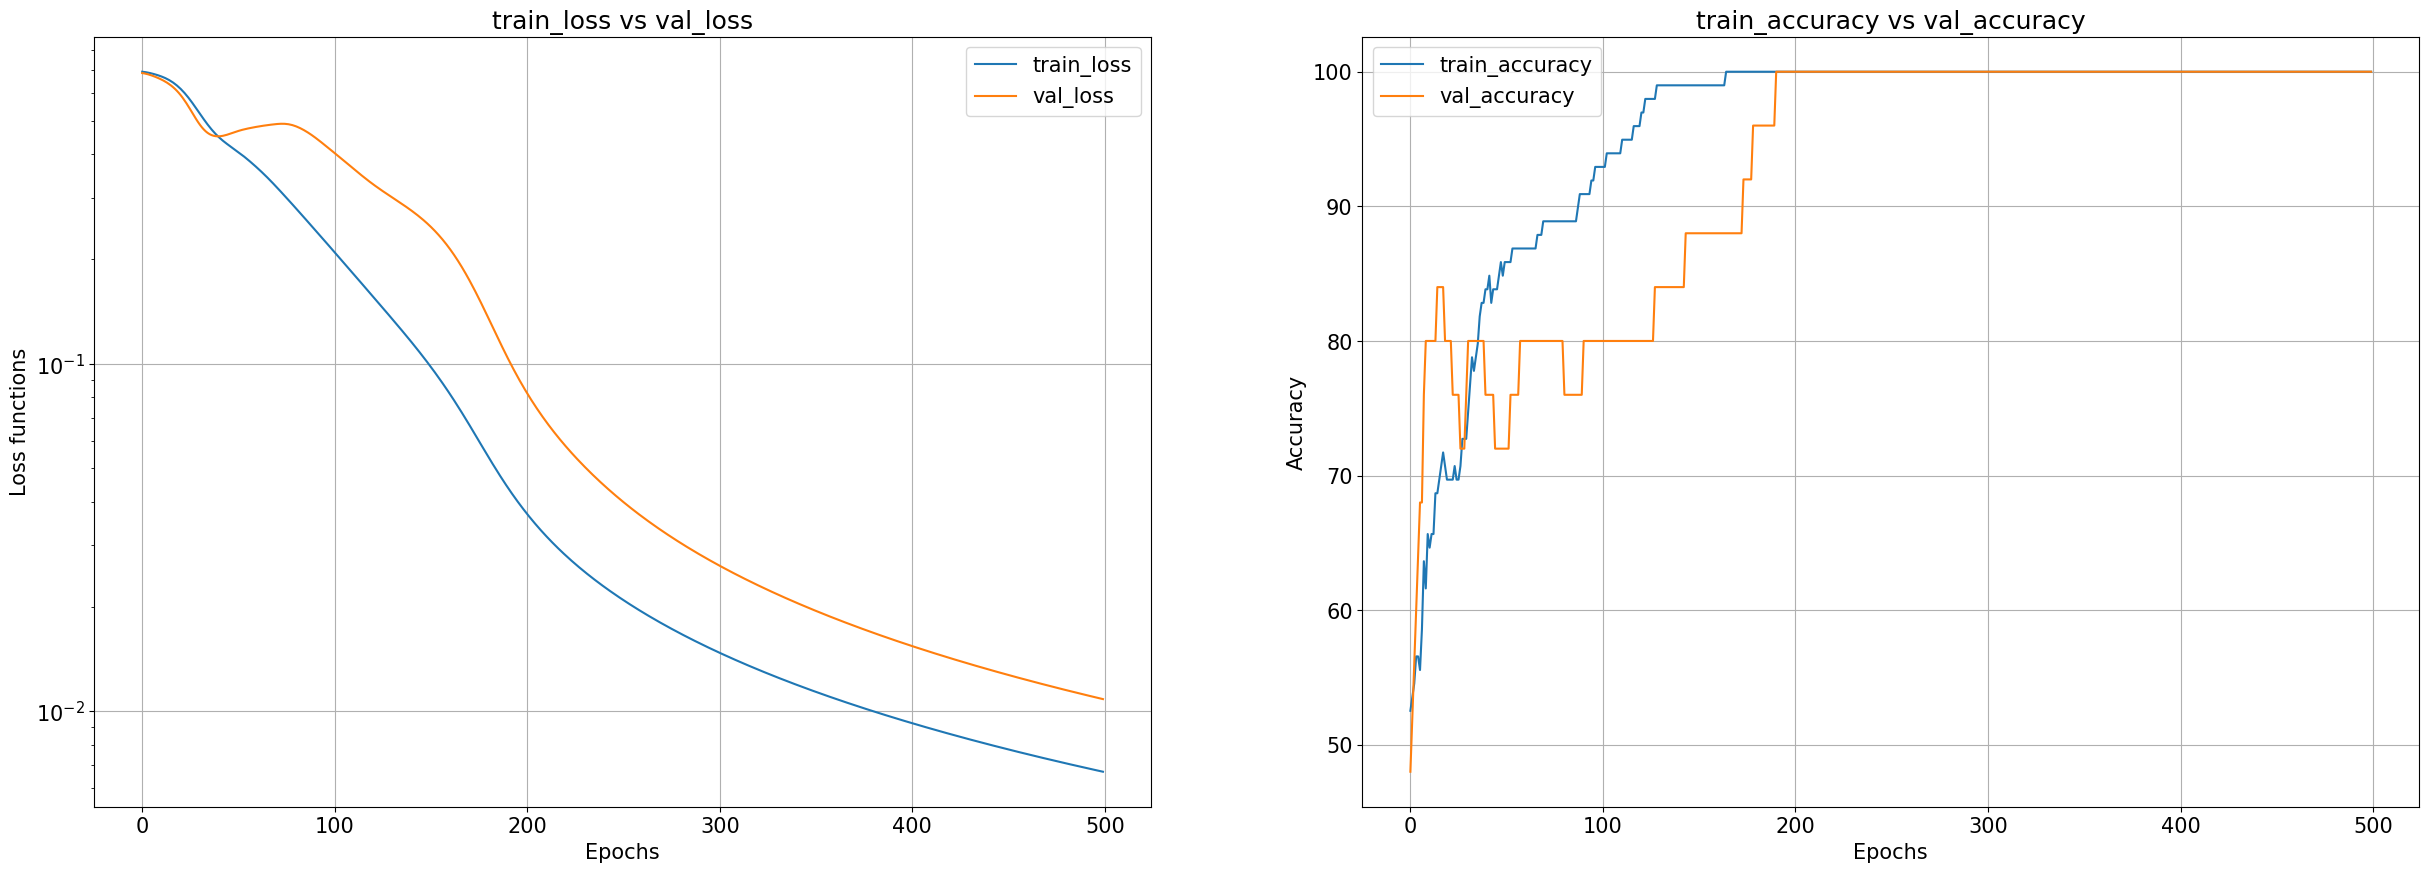

In [42]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_noopt['train_loss'],label='train_loss')
plt.plot(history_noopt['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_noopt['train_accuracy'],label='train_accuracy')
plt.plot(history_noopt['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

### Adam optimizer


Build model


In [43]:
params = orig_params.copy()
input_layer = Input(17)
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
output_layer = Layer(hidden_layer, 1, 'sigm')

model = NeuralNetwork(input_layer, output_layer, loss = 'binary_crossentropy', metrics = [accuracy, MSE])

model.set_initial_weights(init_weights_list)
arr = model.get_initial_weights_list()

Training with Adam optimizer:


In [44]:
np.random.seed(seed)
params['use_opt'] = 1
history_opt = model.train(X_train_monk, y_train_monk.reshape((1,X_train_monk.shape[1])),
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None,
                                    **params
                                    )


Epoch 0: train_loss: 6.734e-01, val_loss: 6.550e-01; train_accuracy: 5.960e+01, val_accuracy: 6.000e+01  train_MSE: 2.402e-01, val_MSE: 2.311e-01  lr : 0.1
Epoch 1: train_loss: 6.373e-01, val_loss: 6.327e-01; train_accuracy: 7.273e+01, val_accuracy: 7.200e+01  train_MSE: 2.224e-01, val_MSE: 2.200e-01  lr : 0.1
Epoch 2: train_loss: 5.963e-01, val_loss: 5.897e-01; train_accuracy: 7.071e+01, val_accuracy: 7.200e+01  train_MSE: 2.028e-01, val_MSE: 1.995e-01  lr : 0.1
Epoch 3: train_loss: 5.470e-01, val_loss: 5.261e-01; train_accuracy: 7.778e+01, val_accuracy: 8.000e+01  train_MSE: 1.805e-01, val_MSE: 1.706e-01  lr : 0.1
Epoch 4: train_loss: 5.069e-01, val_loss: 4.862e-01; train_accuracy: 7.879e+01, val_accuracy: 8.000e+01  train_MSE: 1.639e-01, val_MSE: 1.542e-01  lr : 0.1
Epoch 5: train_loss: 4.705e-01, val_loss: 4.727e-01; train_accuracy: 8.182e+01, val_accuracy: 8.000e+01  train_MSE: 1.486e-01, val_MSE: 1.484e-01  lr : 0.1
Epoch 6: train_loss: 4.450e-01, val_loss: 4.765e-01; train_accur

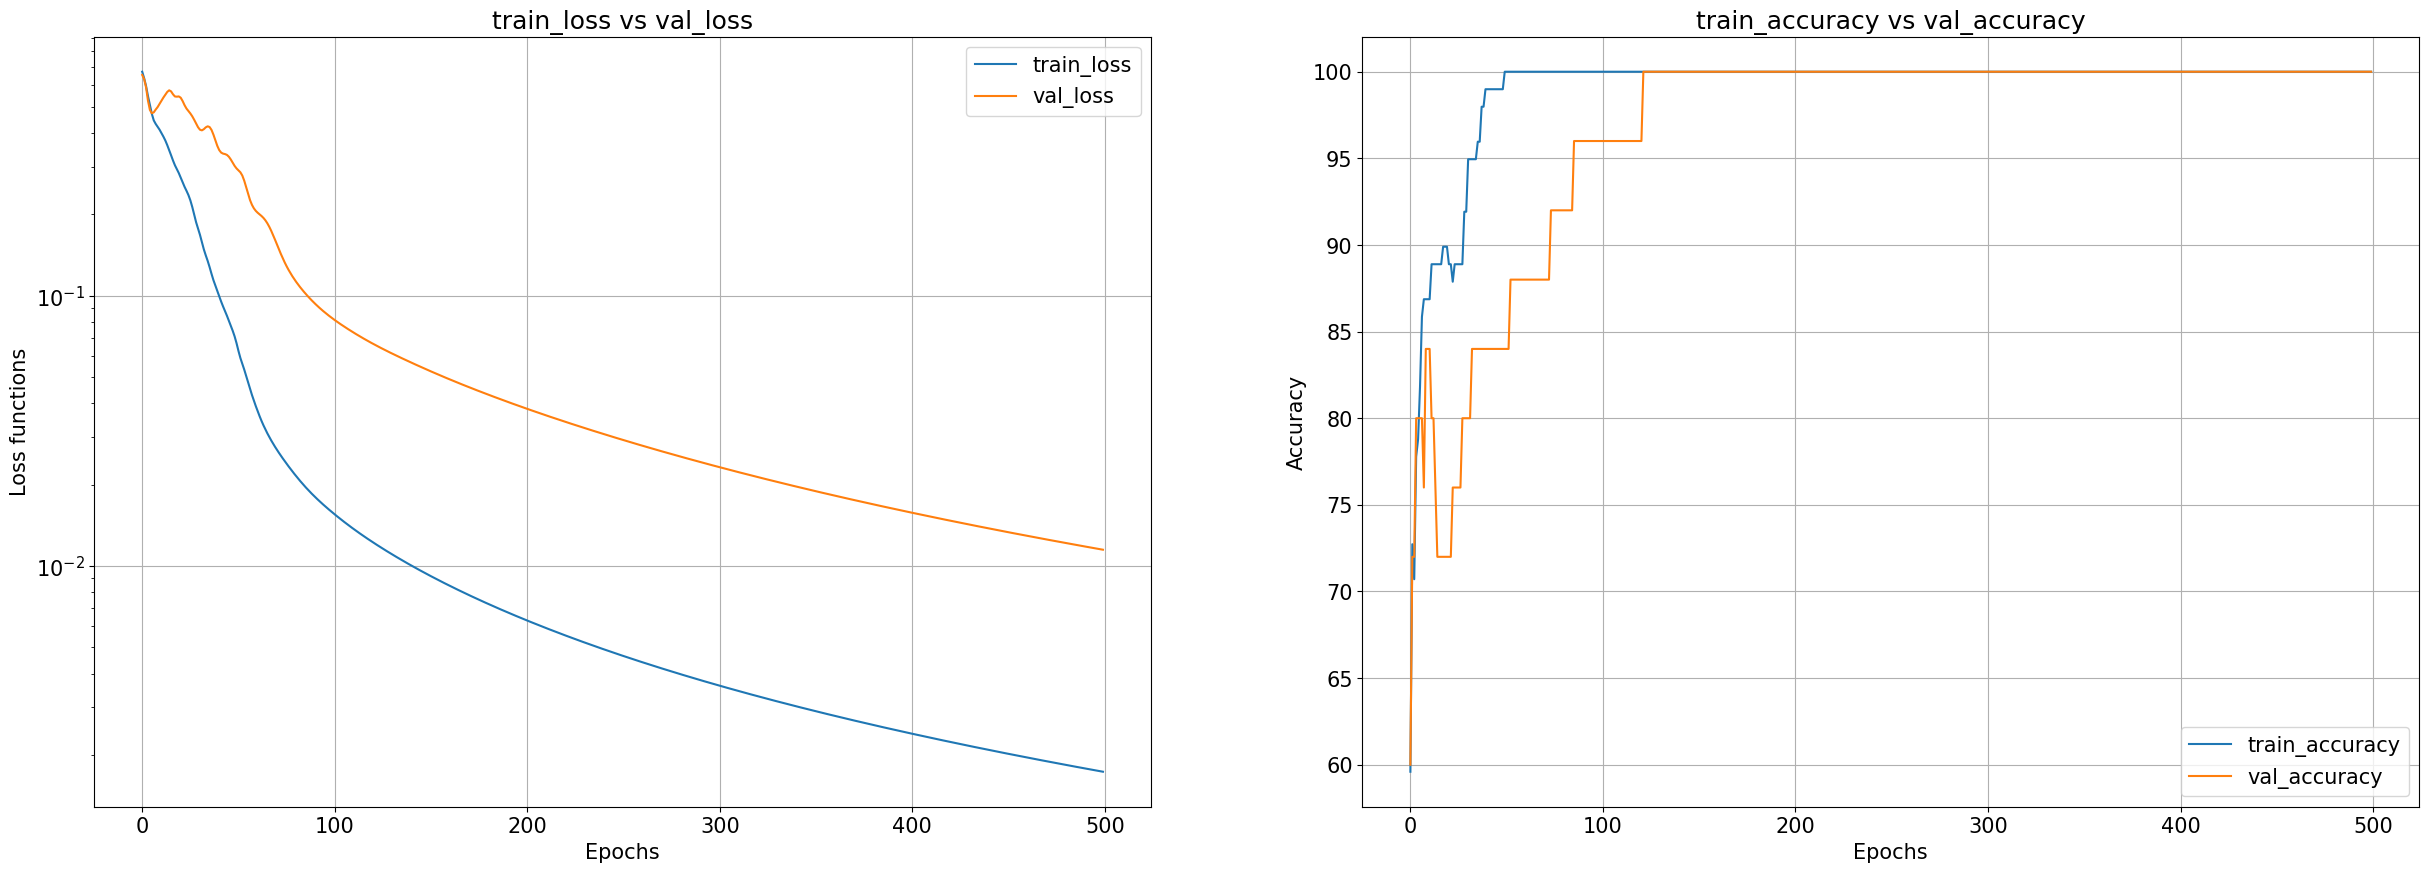

In [45]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_opt['train_loss'],label='train_loss')
plt.plot(history_opt['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_opt['train_accuracy'],label='train_accuracy')
plt.plot(history_opt['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)


### Comparison

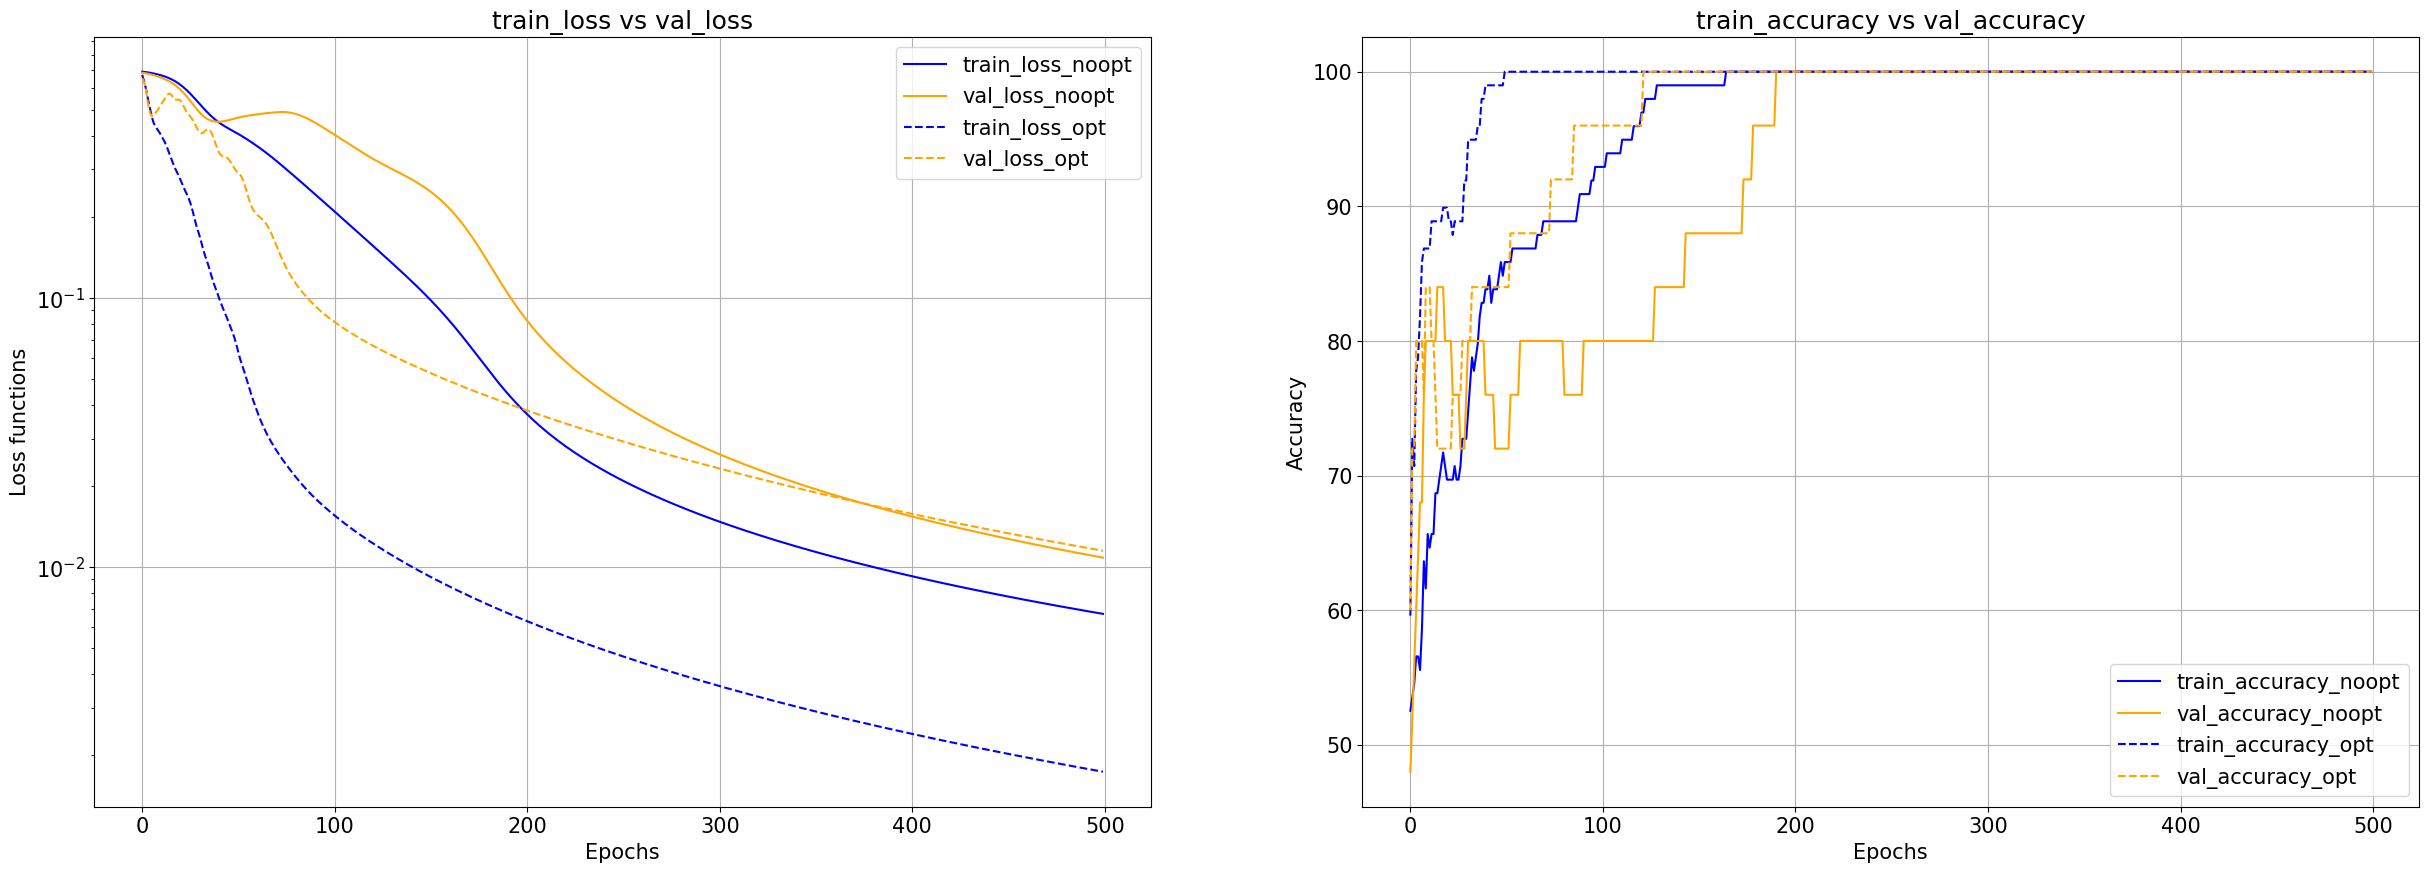

In [46]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_noopt['train_loss'], '-', label='train_loss_noopt', color='blue')
plt.plot(history_noopt['val_loss'], '-', label='val_loss_noopt', color='orange')
plt.plot(history_opt['train_loss'], '--', label='train_loss_opt', color='blue')
plt.plot(history_opt['val_loss'], '--', label='val_loss_opt', color='orange')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_noopt['train_accuracy'], '-',label='train_accuracy_noopt', color='blue')
plt.plot(history_noopt['val_accuracy'], '-', label='val_accuracy_noopt', color='orange')
plt.plot(history_opt['train_accuracy'], '--', label='train_accuracy_opt', color='blue')
plt.plot(history_opt['val_accuracy'], '--', label='val_accuracy_opt', color='orange')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

## CUP

Define training and model hyperparameters

In [9]:
orig_params = {'hidden_dim': 50,
        'hidden_act_func': 'tanh',
        'hidden_dim2': 50,
        'hidden_act_func2' : 'tanh',
        'eta': 0.003,
        'lam': 0.0001,
        'alpha': 0.9,
        'n_batch': 150,
        'use_opt':0,
        'nest': True,
        'l1_reg' : False,
        'epochs' : 500,
        'loss' : 'MSE',
        'output_act_func': 'lin'
        }

seed = np.random.randint(10,1000)

### No optimizer

Build model

In [10]:
params = orig_params.copy()
input_layer = Input(X_train_cup.shape[0])
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
o = 2
while True:
    if f'hidden_dim{o}' in params.keys():
        hidden_layer = Layer(hidden_layer, params.pop(f'hidden_dim{o}'), params.pop(f'hidden_act_func{o}'))
        o += 1
    else: break
output_layer = Layer(hidden_layer, 3, params.pop('output_act_func'))

model = NeuralNetwork(input_layer, output_layer, params.pop('loss'), metrics=[MEE])

init_weights_list = model.get_initial_weights_list()

Training without Adam optimizer:

In [52]:
np.random.seed(seed)
params['use_opt'] = 0
history_noopt = model.train(X_train_cup, y_train_cup,
                                    ** params,
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None
                                    )

Epoch 0: train_loss: 4.608e+02, val_loss: 3.863e+02; train_MEE: 3.231e+01, val_MEE: 2.857e+01  lr : 0.003
Epoch 1: train_loss: 1.787e+02, val_loss: 1.503e+02; train_MEE: 1.938e+01, val_MEE: 1.704e+01  lr : 0.003
Epoch 2: train_loss: 7.503e+01, val_loss: 7.081e+01; train_MEE: 1.258e+01, val_MEE: 1.195e+01  lr : 0.003
Epoch 3: train_loss: 4.393e+01, val_loss: 4.509e+01; train_MEE: 9.797e+00, val_MEE: 9.855e+00  lr : 0.003
Epoch 4: train_loss: 3.302e+01, val_loss: 3.526e+01; train_MEE: 8.756e+00, val_MEE: 8.981e+00  lr : 0.003
Epoch 5: train_loss: 2.122e+01, val_loss: 2.349e+01; train_MEE: 6.586e+00, val_MEE: 6.945e+00  lr : 0.003
Epoch 6: train_loss: 1.577e+01, val_loss: 1.749e+01; train_MEE: 5.522e+00, val_MEE: 5.769e+00  lr : 0.003
Epoch 7: train_loss: 1.332e+01, val_loss: 1.490e+01; train_MEE: 5.176e+00, val_MEE: 5.415e+00  lr : 0.003
Epoch 8: train_loss: 1.198e+01, val_loss: 1.329e+01; train_MEE: 4.966e+00, val_MEE: 5.126e+00  lr : 0.003
Epoch 9: train_loss: 9.932e+00, val_loss: 1.11

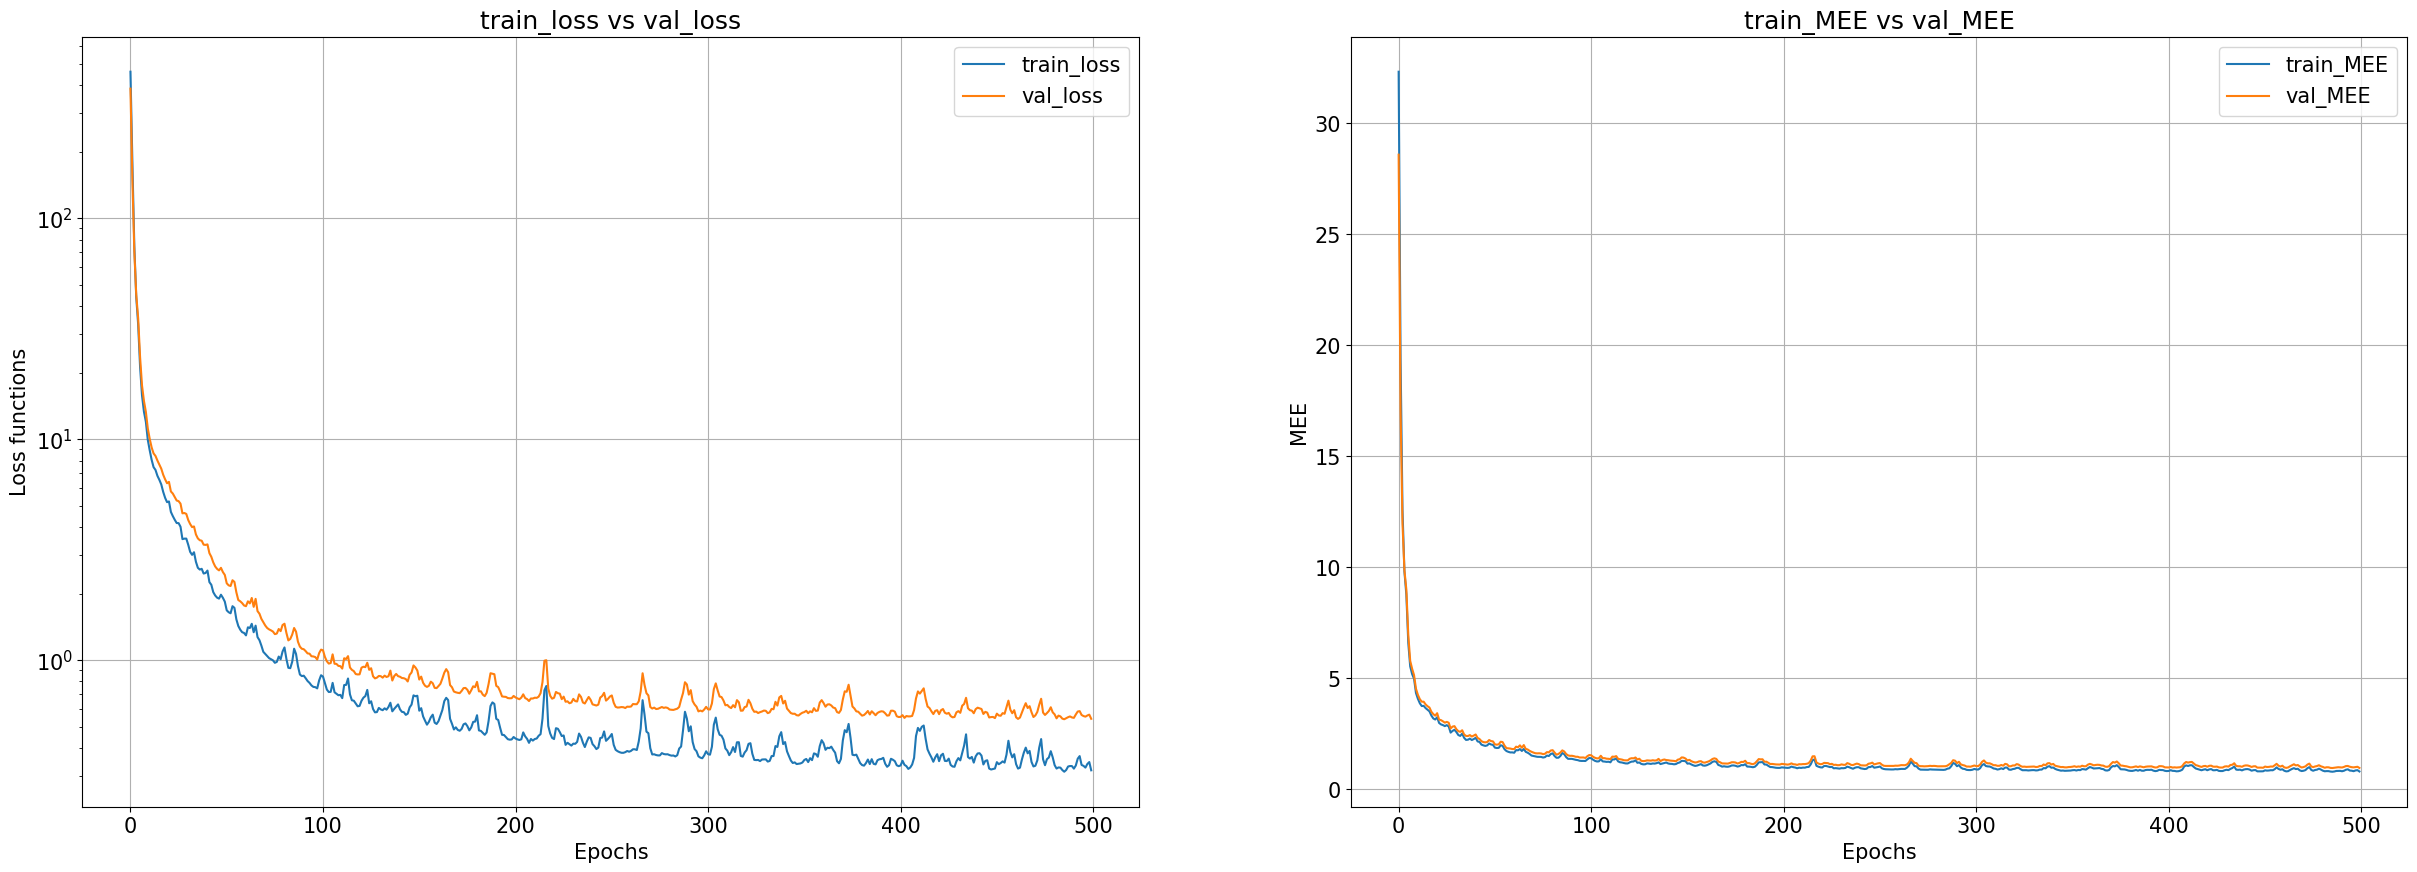

In [53]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_noopt['train_loss'],label='train_loss')
plt.plot(history_noopt['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_noopt['train_MEE'],label='train_MEE')
plt.plot(history_noopt['val_MEE'], label='val_MEE')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs val_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

### Adam optimizer


Build model


In [11]:
params = orig_params.copy()
input_layer = Input(X_train_cup.shape[0])
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
o = 2
while True:
    if f'hidden_dim{o}' in params.keys():
        hidden_layer = Layer(hidden_layer, params.pop(f'hidden_dim{o}'), params.pop(f'hidden_act_func{o}'))
        o += 1
    else: break
output_layer = Layer(hidden_layer, 3, params.pop('output_act_func'))

model = NeuralNetwork(input_layer, output_layer, params.pop('loss'), metrics=[MEE])

model.set_initial_weights(init_weights_list)

Training with Adam optimizer:


In [12]:
np.random.seed(42)
params['use_opt'] = 1
history_opt = model.train(X_train_cup, y_train_cup,
                                    ** params,
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None
                                    )

Epoch 0: train_loss: 7.343e+02, val_loss: 7.301e+02; train_MEE: 4.168e+01, val_MEE: 4.130e+01  lr : 0.003
Epoch 1: train_loss: 6.862e+02, val_loss: 6.824e+02; train_MEE: 4.005e+01, val_MEE: 3.966e+01  lr : 0.003
Epoch 2: train_loss: 6.456e+02, val_loss: 6.410e+02; train_MEE: 3.863e+01, val_MEE: 3.822e+01  lr : 0.003
Epoch 3: train_loss: 6.100e+02, val_loss: 6.053e+02; train_MEE: 3.738e+01, val_MEE: 3.697e+01  lr : 0.003
Epoch 4: train_loss: 5.791e+02, val_loss: 5.741e+02; train_MEE: 3.628e+01, val_MEE: 3.586e+01  lr : 0.003
Epoch 5: train_loss: 5.513e+02, val_loss: 5.469e+02; train_MEE: 3.528e+01, val_MEE: 3.488e+01  lr : 0.003
Epoch 6: train_loss: 5.268e+02, val_loss: 5.228e+02; train_MEE: 3.437e+01, val_MEE: 3.400e+01  lr : 0.003
Epoch 7: train_loss: 5.046e+02, val_loss: 5.012e+02; train_MEE: 3.353e+01, val_MEE: 3.320e+01  lr : 0.003
Epoch 8: train_loss: 4.847e+02, val_loss: 4.818e+02; train_MEE: 3.274e+01, val_MEE: 3.245e+01  lr : 0.003
Epoch 9: train_loss: 4.667e+02, val_loss: 4.64

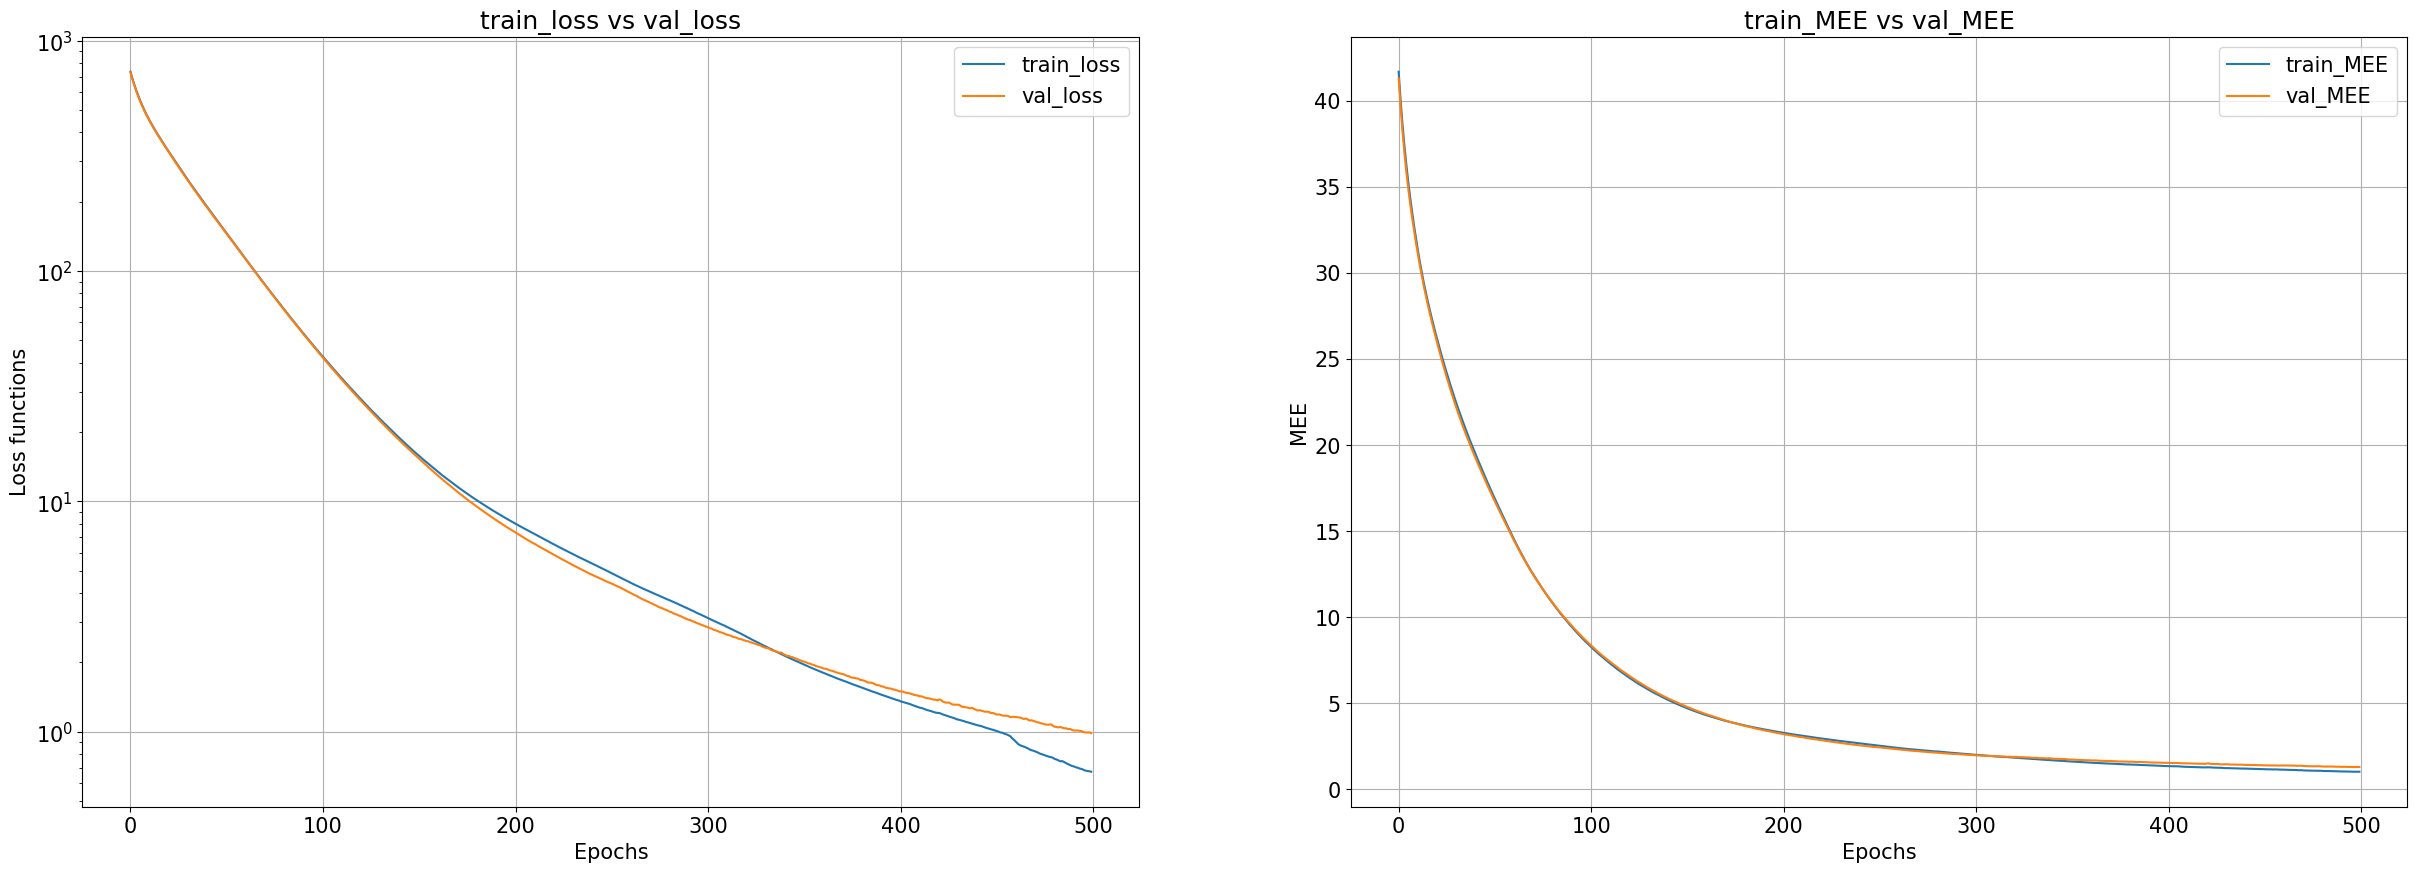

In [13]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_opt['train_loss'],label='train_loss')
plt.plot(history_opt['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_opt['train_MEE'],label='train_MEE')
plt.plot(history_opt['val_MEE'], label='val_MEE')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs val_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)


### Comparison

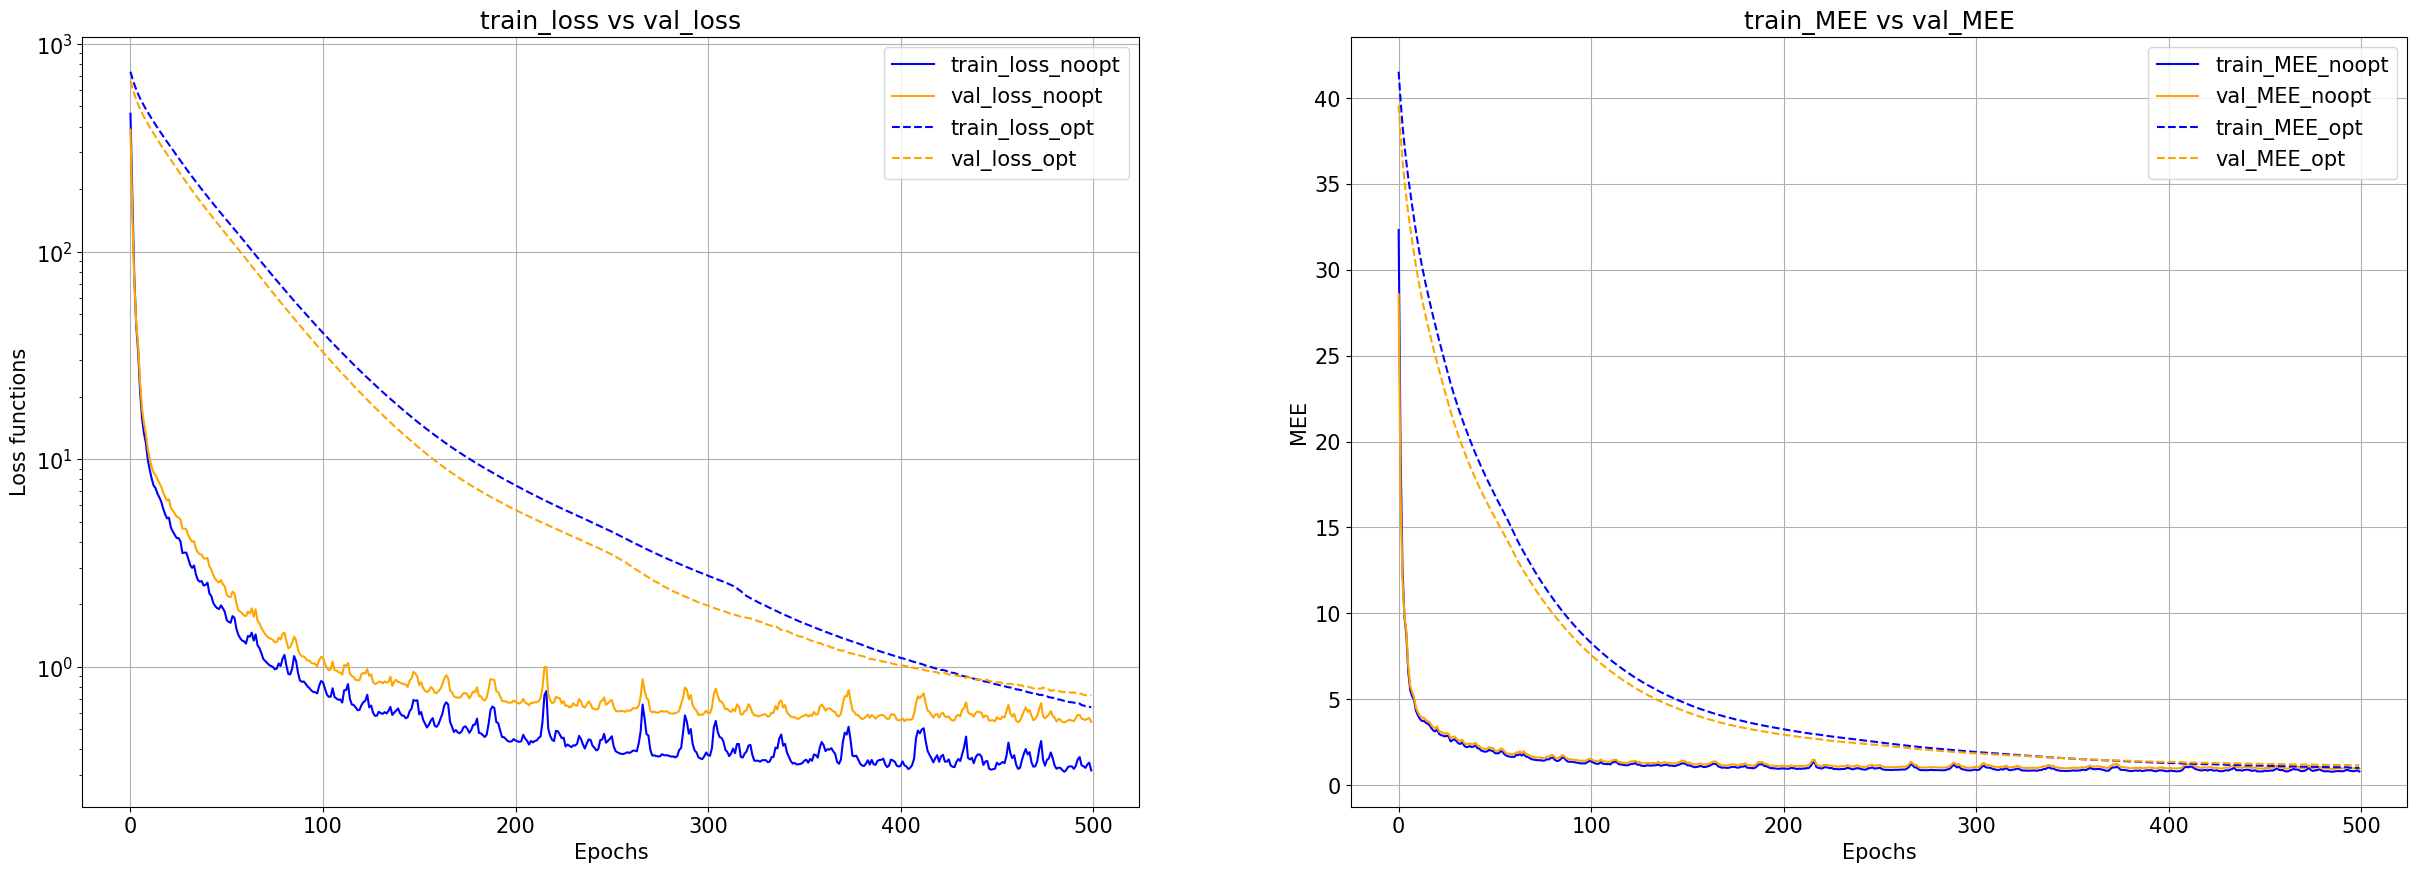

In [57]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_noopt['train_loss'], '-', label='train_loss_noopt', color='blue')
plt.plot(history_noopt['val_loss'], '-', label='val_loss_noopt', color='orange')
plt.plot(history_opt['train_loss'], '--', label='train_loss_opt', color='blue')
plt.plot(history_opt['val_loss'], '--', label='val_loss_opt', color='orange')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_noopt['train_MEE'], '-',label='train_MEE_noopt', color='blue')
plt.plot(history_noopt['val_MEE'], '-', label='val_MEE_noopt', color='orange')
plt.plot(history_opt['train_MEE'], '--', label='train_MEE_opt', color='blue')
plt.plot(history_opt['val_MEE'], '--', label='val_MEE_opt', color='orange')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs val_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)